Source:

Source: 
Dr.P.Soundarapandian.M.D.,D.M 
(Senior Consultant Nephrologist), 
Apollo Hospitals, 
Managiri, 
Madurai Main Road, 
Karaikudi, 
Tamilnadu, 
India. 

Creator: 
L.Jerlin Rubini(Research Scholar) 
Alagappa University, 
EmailId :jel.jerlin '@' gmail.com 
ContactNo :+91-9597231281 

Guided by: 
Dr.P.Eswaran Assistant Professor, 
Department of Computer Science and Engineering, 
Alagappa University, 
Karaikudi, 
Tamilnadu, 
India. 
Emailid:eswaranperumal '@' gmail.com



### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Data Preparation
  - Data Cleaning
  
4. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  - Feature Encoding
  
5. Model Building
  - Split X & y
  - Feature Scaling
  - Train Test split
  - Train Model
  - Model Prediction
  - Model Evaluation
  - Feature importance
   
6. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model

## Inputs

The notebook is designed in such a way that you just need to plug in the input values given below and run the code. It will run on it's own and will build the model as well. 

In [116]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [117]:
# Input file name with path
input_file_name = 'kidney_disease.csv'

# Target class name
input_target_class = "class"

# Columns to be removed
input_drop_col = "id"

# Col datatype selection
input_datatype_selection = 'auto'  # use auto if you don't want to provide column names by data type else use 'manual'

# Categorical columns
input_cat_columns = [
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class']

# Numerical columns
input_num_columns = ['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'sugar','blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin']

# Encoding technique
input_encoding = 'LabelEncoder' # choose the encoding technique from 'LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder' and 'FrequencyEncoder'

# Handle missing value
input_treat_missing_value = 'impute' # choose how to handle missing values from 'drop','inpute' and 'ignore'


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [118]:
from pyforest import *

In [205]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2
from sklearn.model_selection import RandomizedSearchCV

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [120]:
# Read data in form of a csv file
df = pd.read_csv(input_file_name)

# First 5 rows of the dataset
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no            ckd  
1   no            ckd  
2  yes            ckd  
3  yes            ckd  
4   no            ckd

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode 
- Min, max
- Count etc

Let's understand the data we have

In [12]:
# Dimension of the data
df.shape

(400, 26)

In [13]:
# Summary of the dataset
df.describe().T

count        mean         std     min     25%     50%     75%      max
id    400.0  199.500000  115.614301   0.000   99.75  199.50  299.25  399.000
age   391.0   51.483376   17.169714   2.000   42.00   55.00   64.50   90.000
bp    388.0   76.469072   13.683637  50.000   70.00   80.00   80.00  180.000
sg    353.0    1.017408    0.005717   1.005    1.01    1.02    1.02    1.025
al    354.0    1.016949    1.352679   0.000    0.00    0.00    2.00    5.000
su    351.0    0.450142    1.099191   0.000    0.00    0.00    0.00    5.000
bgr   356.0  148.036517   79.281714  22.000   99.00  121.00  163.00  490.000
bu    381.0   57.425722   50.503006   1.500   27.00   42.00   66.00  391.000
sc    383.0    3.072454    5.741126   0.400    0.90    1.30    2.80   76.000
sod   313.0  137.528754   10.408752   4.500  135.00  138.00  142.00  163.000
pot   312.0    4.627244    3.193904   2.500    3.80    4.40    4.90   47.000
hemo  348.0   12.526437    2.912587   3.100   10.30   12.65   15.00   17.800

### 2.1.1 parsing metadata columns names to rename df column names

In [121]:
columns=pd.read_csv('data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [122]:
columns

cols            abb_col_names
0               id                        id
1              age                       age
2               bp            blood pressure
3               sg          specific gravity
4               al                   albumin
5               su                     sugar
6              rbc           red blood cells
7               pc                  pus cell
8              pcc           pus cell clumps
9               ba                  bacteria
10             bgr      blood glucose random
11              bu                blood urea
12              sc          serum creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed cell volume
17              wc    white blood cell count
18              rc      red blood cell count
19             htn               ypertension
20              dm         diabetes mellitus
21             cad   coronary artery disease
22           appet                  appetite
23              pe               pedal edema
24             ane                    anemia
25  classification                     class

In [123]:
df.columns=columns['abb_col_names'].values

In [124]:
df.head()

id   age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  blood urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum creatinine  sodium  potassium  haemoglobin packed cell volume  \
0               1.2     NaN        NaN         15.4                 44   
1               0.8     NaN        NaN         11.3                 38   
2               1.8     NaN        NaN          9.6                 31   
3               3.8   111.0        2.5         11.2                 32   
4               1.4     NaN        NaN         11.6                 35   

  white blood cell count red blood cell count ypertension diabetes mellitus  \
0                   7800                  5.2         yes               yes   
1                   6000                  NaN          no                no   
2                   7500                  NaN          no               yes   
3                   6700                  3.9         yes                no   
4                   7300                  4.6          no                no   

  coronary artery disease appetite pedal edema anemia class  
0                      no     good          no     no   ckd  
1                      no     good          no     no   ckd  
2                      no     poor          no    yes   ckd  
3                      no     poor         yes    yes   ckd  
4                      no     good          no     no   ckd

In [18]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [19]:
df.columns

Index(['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [125]:
df.columns = df.columns.str.replace(' ','_')

### convert some features to numeric

In [126]:
features=['red_blood_cell_count','packed_cell_volume','white_blood_cell_count']
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
for feature in features:
    convert_dtype(df,feature)

In [127]:
df.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
ypertension                 object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

### 2.2 Missing Values

Get the info about missing values in the dataframe

In [128]:
# Missing values for every column
df.isna().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
ypertension                  2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 3.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

In [129]:
# Select how you wish to treat missing values according to the input provided
if input_treat_missing_value == 'drop':
    
    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif input_treat_missing_value == 'impute': 
    
    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].median())
    for col in categorical_columns:
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(mode)
elif input_treat_missing_value == 'ignore':
    print("Ignore missing values")

In [130]:
df.head()

id   age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0   0  48.0            80.0             1.020      1.0    0.0          normal   
1   1   7.0            50.0             1.020      4.0    0.0          normal   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                 121.0        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   138.0        4.4         15.4                44.0   
1               0.8   138.0        4.4         11.3                38.0   
2               1.8   138.0        4.4          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   138.0        4.4         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count ypertension diabetes_mellitus  \
0                  7800.0                   5.2         yes               yes   
1                  6000.0                   4.8          no                no   
2                  7500.0                   4.8          no               yes   
3                  6700.0                   3.9         yes                no   
4                  7300.0                   4.6          no                no   

  coronary_artery_disease appetite pedal_edema anemia class  
0                      no     good          no     no   ckd  
1                      no     good          no     no   ckd  
2                      no     poor          no    yes   ckd  
3                      no     poor         yes    yes   ckd  
4                      no     good          no     no   ckd

In [161]:
### total unique categories in our categorical features to check if any dirtiness in data or not
for col in categorical_columns:
    print('{} has {} categories'.format(col, df[col].unique()))

appetite has [0 1] categories
anemia has [0 1] categories
bacteria has [0 1] categories
coronary_artery_disease has [0 1] categories
pus_cell has [1 0] categories
pedal_edema has [0 1] categories
class has [0 1] categories
ypertension has [1 0] categories
diabetes_mellitus has [1 0] categories
red_blood_cells has [1 0] categories
pus_cell_clumps has [0 1] categories


In [132]:
#Replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [133]:
df.head()

id   age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0   0  48.0            80.0             1.020      1.0    0.0          normal   
1   1   7.0            50.0             1.020      4.0    0.0          normal   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                 121.0        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   138.0        4.4         15.4                44.0   
1               0.8   138.0        4.4         11.3                38.0   
2               1.8   138.0        4.4          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   138.0        4.4         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count ypertension diabetes_mellitus  \
0                  7800.0                   5.2         yes               yes   
1                  6000.0                   4.8          no                no   
2                  7500.0                   4.8          no               yes   
3                  6700.0                   3.9         yes                no   
4                  7300.0                   4.6          no                no   

  coronary_artery_disease appetite pedal_edema anemia class  
0                      no     good          no     no   ckd  
1                      no     good          no     no   ckd  
2                      no     poor          no    yes   ckd  
3                      no     poor         yes    yes   ckd  
4                      no     good          no     no   ckd

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 4.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [136]:
# Remove extra columns
col_remove = input_drop_col
df = df.drop(col_remove, axis = 1)

KeyError: "['id'] not found in axis"

**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 4.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

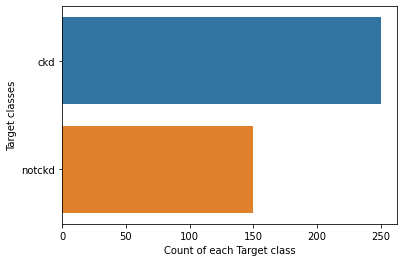

In [137]:
# Check distribution of target class
sns.countplot(y=df[input_target_class] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 4.3. Check the distribution of every feature

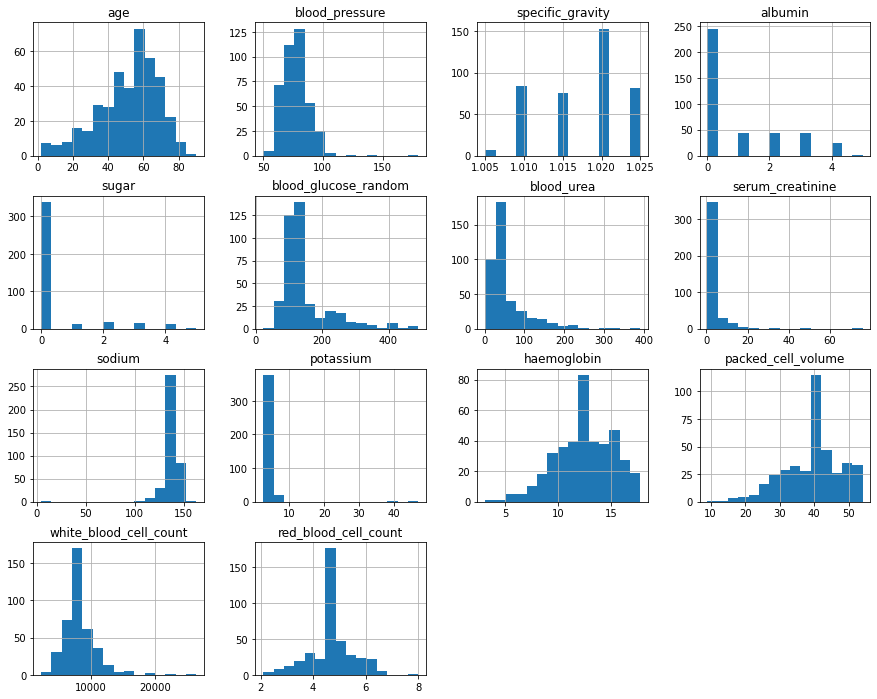

In [138]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

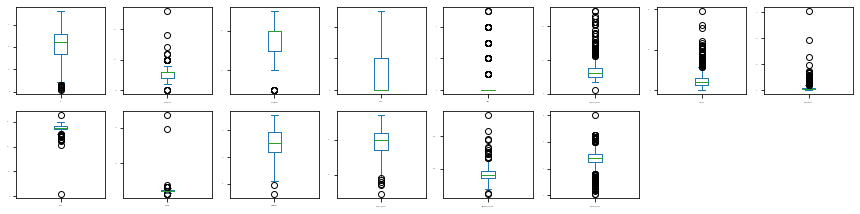

In [139]:
# box and whisker plots 
df.plot(figsize=(15, 15), kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1) 
plt.show()

<AxesSubplot:>

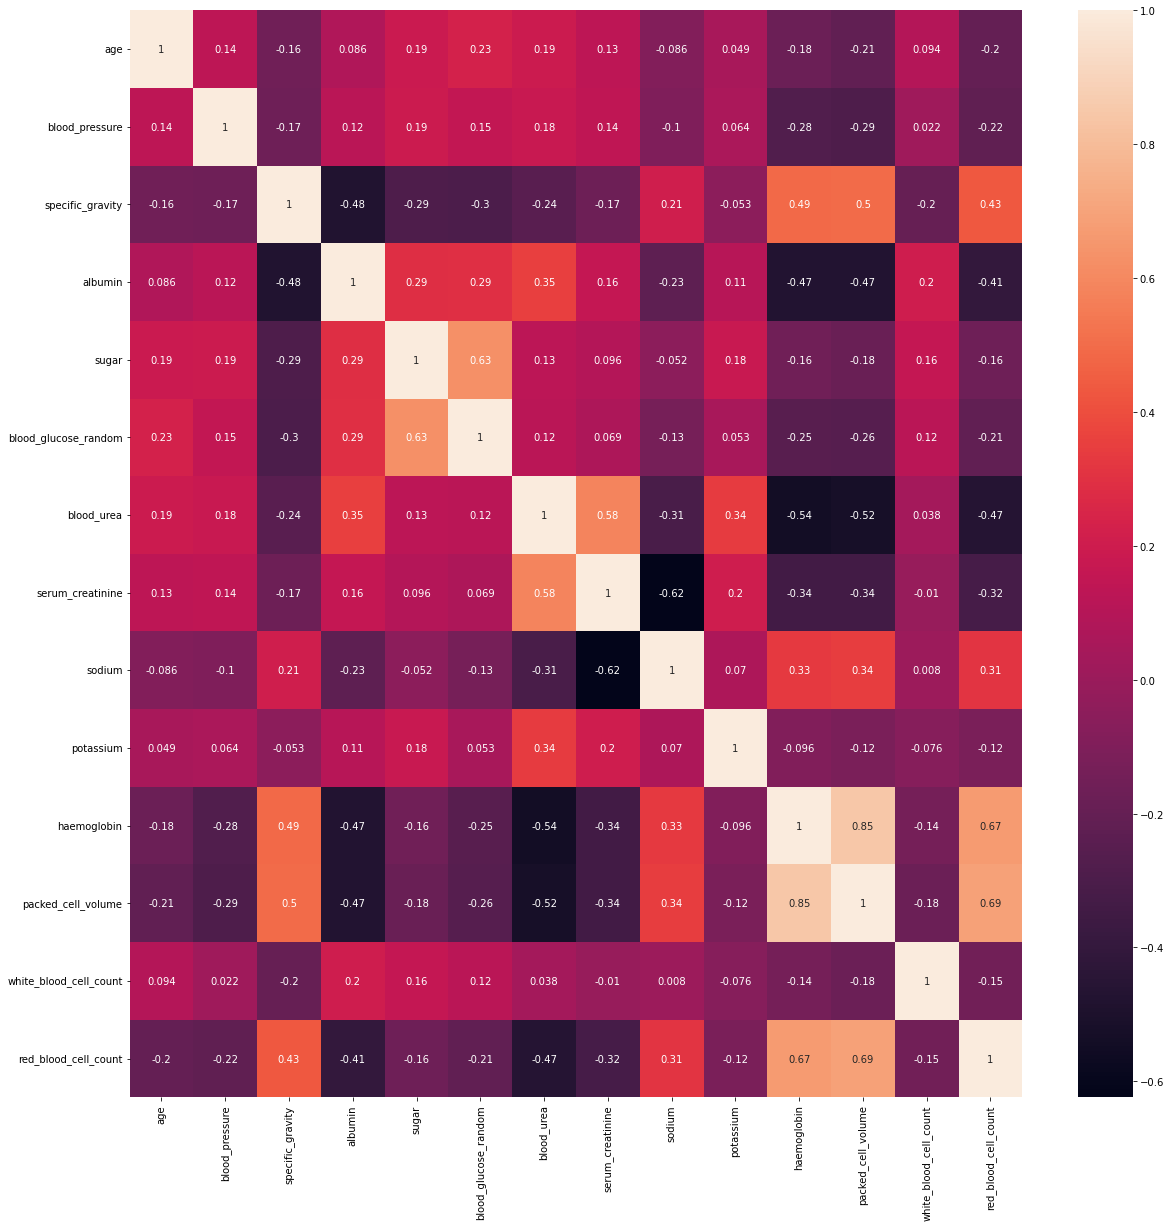

In [140]:
# Heatmap of correlation between features
plt.figure(figsize = (20, 20))
sns.heatmap(df.drop(['class'], axis = 1).corr(), annot = True)

Dive deeper on correlations, since some correlations could determine target feature(class) and demonstrated by visualization

Positive Correlation:
    specific_gravity -> red_blood_cell_count, packed_cell_volume, haemoglobin
    sugar -> blood_glucose_random
    blood_urea -> serum_creatinine
    haemoglobin -> red_blood_cell_count <- packed_cell_volume
    
    
Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin
    Serum creatinine -> Sodium

In [141]:
# define kde_plot
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()
    

In [142]:
pos_features = df[['specific_gravity', 'red_blood_cell_count', 'packed_cell_volume', 'haemoglobin', 'sugar', 'blood_glucose_random',
    'blood_urea', 'serum_creatinine']]

In [143]:
pos_features[pos_features.columns]

specific_gravity  red_blood_cell_count  packed_cell_volume  haemoglobin  \
0               1.020                   5.2                44.0        15.40   
1               1.020                   4.8                38.0        11.30   
2               1.010                   4.8                31.0         9.60   
3               1.005                   3.9                32.0        11.20   
4               1.010                   4.6                35.0        11.60   
5               1.015                   4.4                39.0        12.20   
6               1.010                   4.8                36.0        12.40   
7               1.015                   5.0                44.0        12.40   
8               1.015                   4.0                33.0        10.80   
9               1.020                   3.7                29.0         9.50   
10              1.010                   4.8                28.0         9.40   
11              1.010                   3.8                32.0        10.80   
12              1.015                   3.4                28.0         9.70   
13              1.020                   4.8                40.0         9.80   
14              1.010                   2.6                16.0         5.60   
15              1.015                   2.8                24.0         7.60   
16              1.015                   4.8                40.0        12.60   
17              1.020                   4.8                40.0        12.10   
18              1.025                   4.3                37.0        12.70   
19              1.015                   3.7                30.0        10.30   
20              1.015                   3.2                24.0         7.70   
21              1.020                   3.6                32.0        10.90   
22              1.025                   3.4                32.0         9.80   
23              1.010                   4.8                40.0        12.65   
24              1.015                   4.6                39.0        11.10   
25              1.025                   3.7                29.0         9.90   
26              1.015                   4.0                35.0        11.60   
27              1.010                   4.1                37.0        12.50   
28              1.020                   4.8                40.0        12.65   
29              1.005                   4.8                38.0        12.90   
30              1.020                   4.8                40.0        12.65   
31              1.015                   4.0                30.0        10.10   
32              1.010                   4.0                34.0        11.30   
33              1.020                   4.8                29.0        10.10   
34              1.010                   4.8                40.0        12.65   
35              1.020                   4.9                36.0        12.00   
36              1.015                   4.8                32.0        10.30   
37              1.020                   2.5                28.0         9.70   
38              1.020                   4.8                40.0        12.50   
39              1.010                   4.2                40.0        13.00   
40              1.010                   4.1                32.0        11.10   
41              1.010                   4.8                40.0        12.65   
42              1.010                   4.5                33.0         9.70   
43              1.010                   3.1                24.0         7.90   
44              1.010                   4.8                28.0         9.70   
45              1.020                   4.8                40.0         9.30   
46              1.015                   4.7                37.0        12.40   
47              1.010                   4.8                45.0        15.00   
48              1.005                   3.5                29.0        10.00   
49   

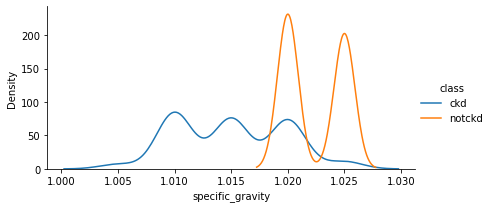

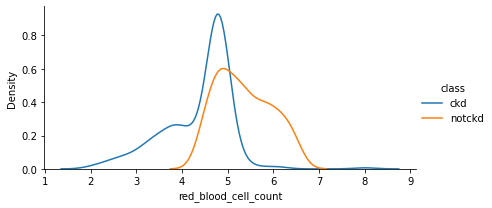

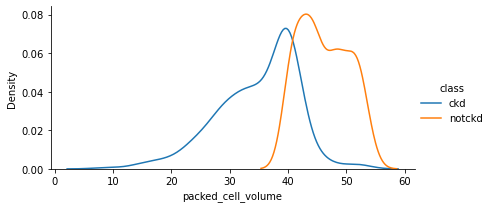

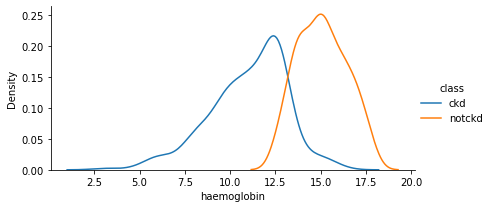

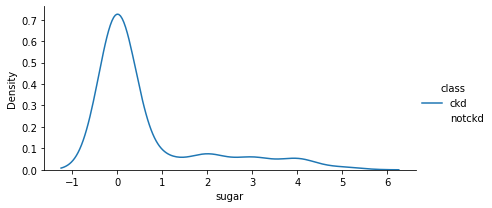

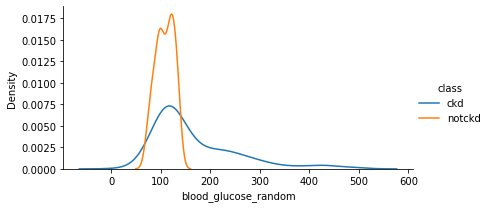

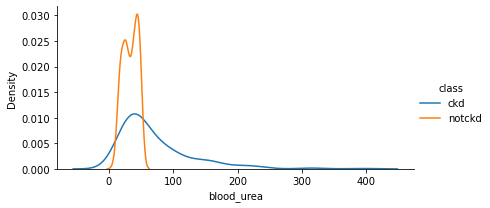

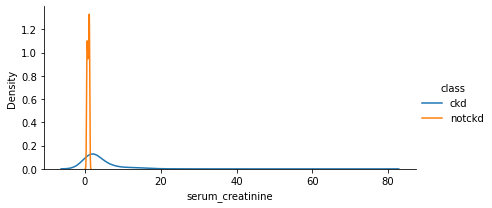

In [144]:
for pos_feature in pos_features:
    kde_plot(pos_feature)

In [145]:
import plotly.express as px

In [146]:
# Defining violin and scatter plot 
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

In [147]:
for pos_feature in pos_features:
    violin(pos_feature)

In [148]:
## look at scatters of some features for pos correlation

In [149]:
# fig,axes = plt.subplots(1,3,figsize=(10,5))
# axes[0].scatter(df['red_blood_cell_count'], df['packed_cell_volume'], c=df['class'])
# axes[0].set_xlabel('red_blood_cell_count')
# axes[0].set_ylabel('packed_cell_volume')
# axes[1].scatter(df['red_blood_cell_count'], df['haemoglobin'], c=df['class'])
# axes[1].set_xlabel('red_blood_cell_count')
# axes[1].set_ylabel('haemoglobin')
# axes[2].scatter(df['packed_cell_volume'], df['haemoglobin'], c=df['class'])
# axes[2].set_xlabel('packed_cell_volume')
# axes[2].set_ylabel('haemoglobin')
# fig.subplots_adjust(wspace=0.4)
# plt.show()

In [150]:
scatters('red_blood_cell_count', 'packed_cell_volume')

In [151]:
scatters('red_blood_cell_count', 'haemoglobin')

In [152]:
scatters('haemoglobin','packed_cell_volume')

<Figure size 720x720 with 0 Axes>

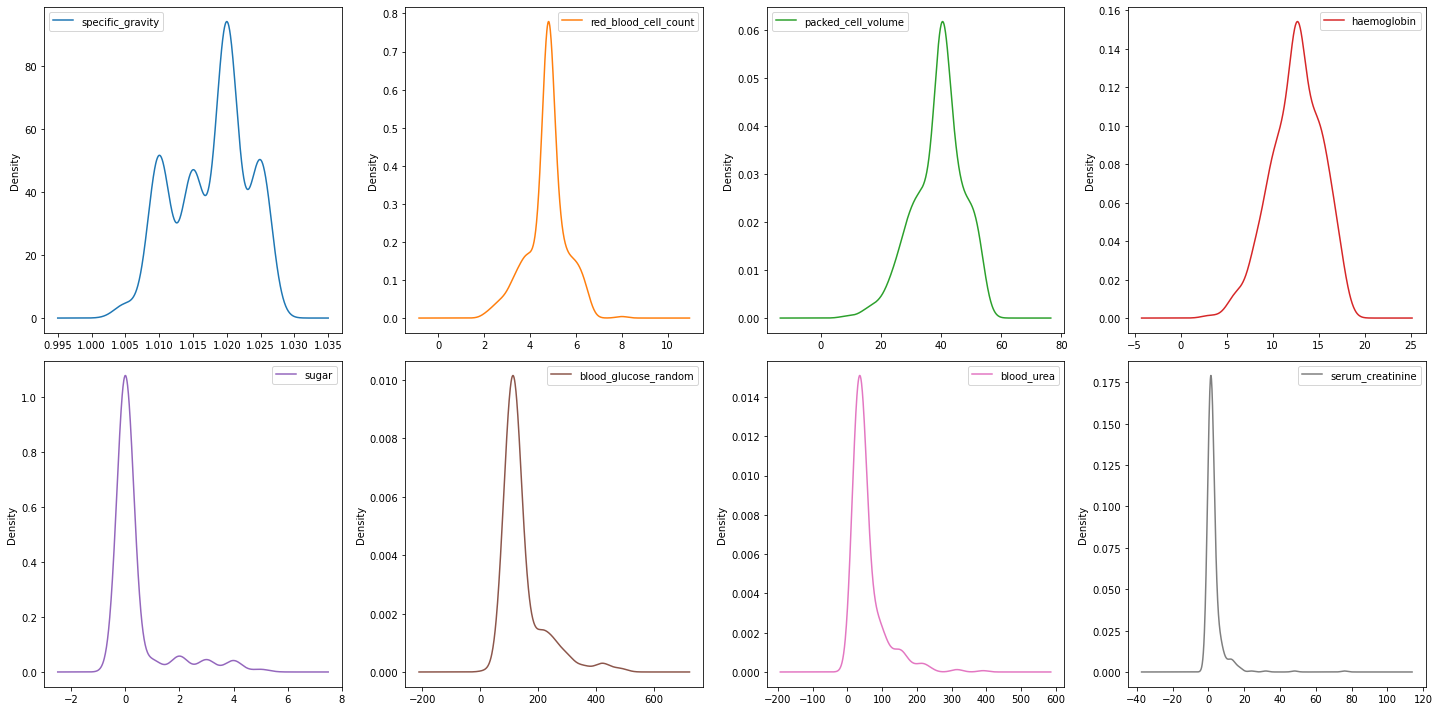

In [153]:
pos_names = ['specific_gravity', 'red_blood_cell_count', 'packed_cell_volume', 'haemoglobin', 'sugar', 'blood_glucose_random',
    'blood_urea', 'serum_creatinine']
df_pos_names = df[pos_names]

plt.figure(figsize=(10,10))
df_pos_names.plot(figsize=(20,10), kind='density', subplots=True, layout=(2,4), sharex=False)

plt.tight_layout()

In [154]:
## Negative corr visualization

In [155]:
scatters('red_blood_cell_count','albumin')

In [156]:
scatters('packed_cell_volume','blood_urea')

In [157]:
fig = px.bar(df, x="specific_gravity", y="packed_cell_volume",
             color='class', barmode='group',
             height=400)
fig.show()

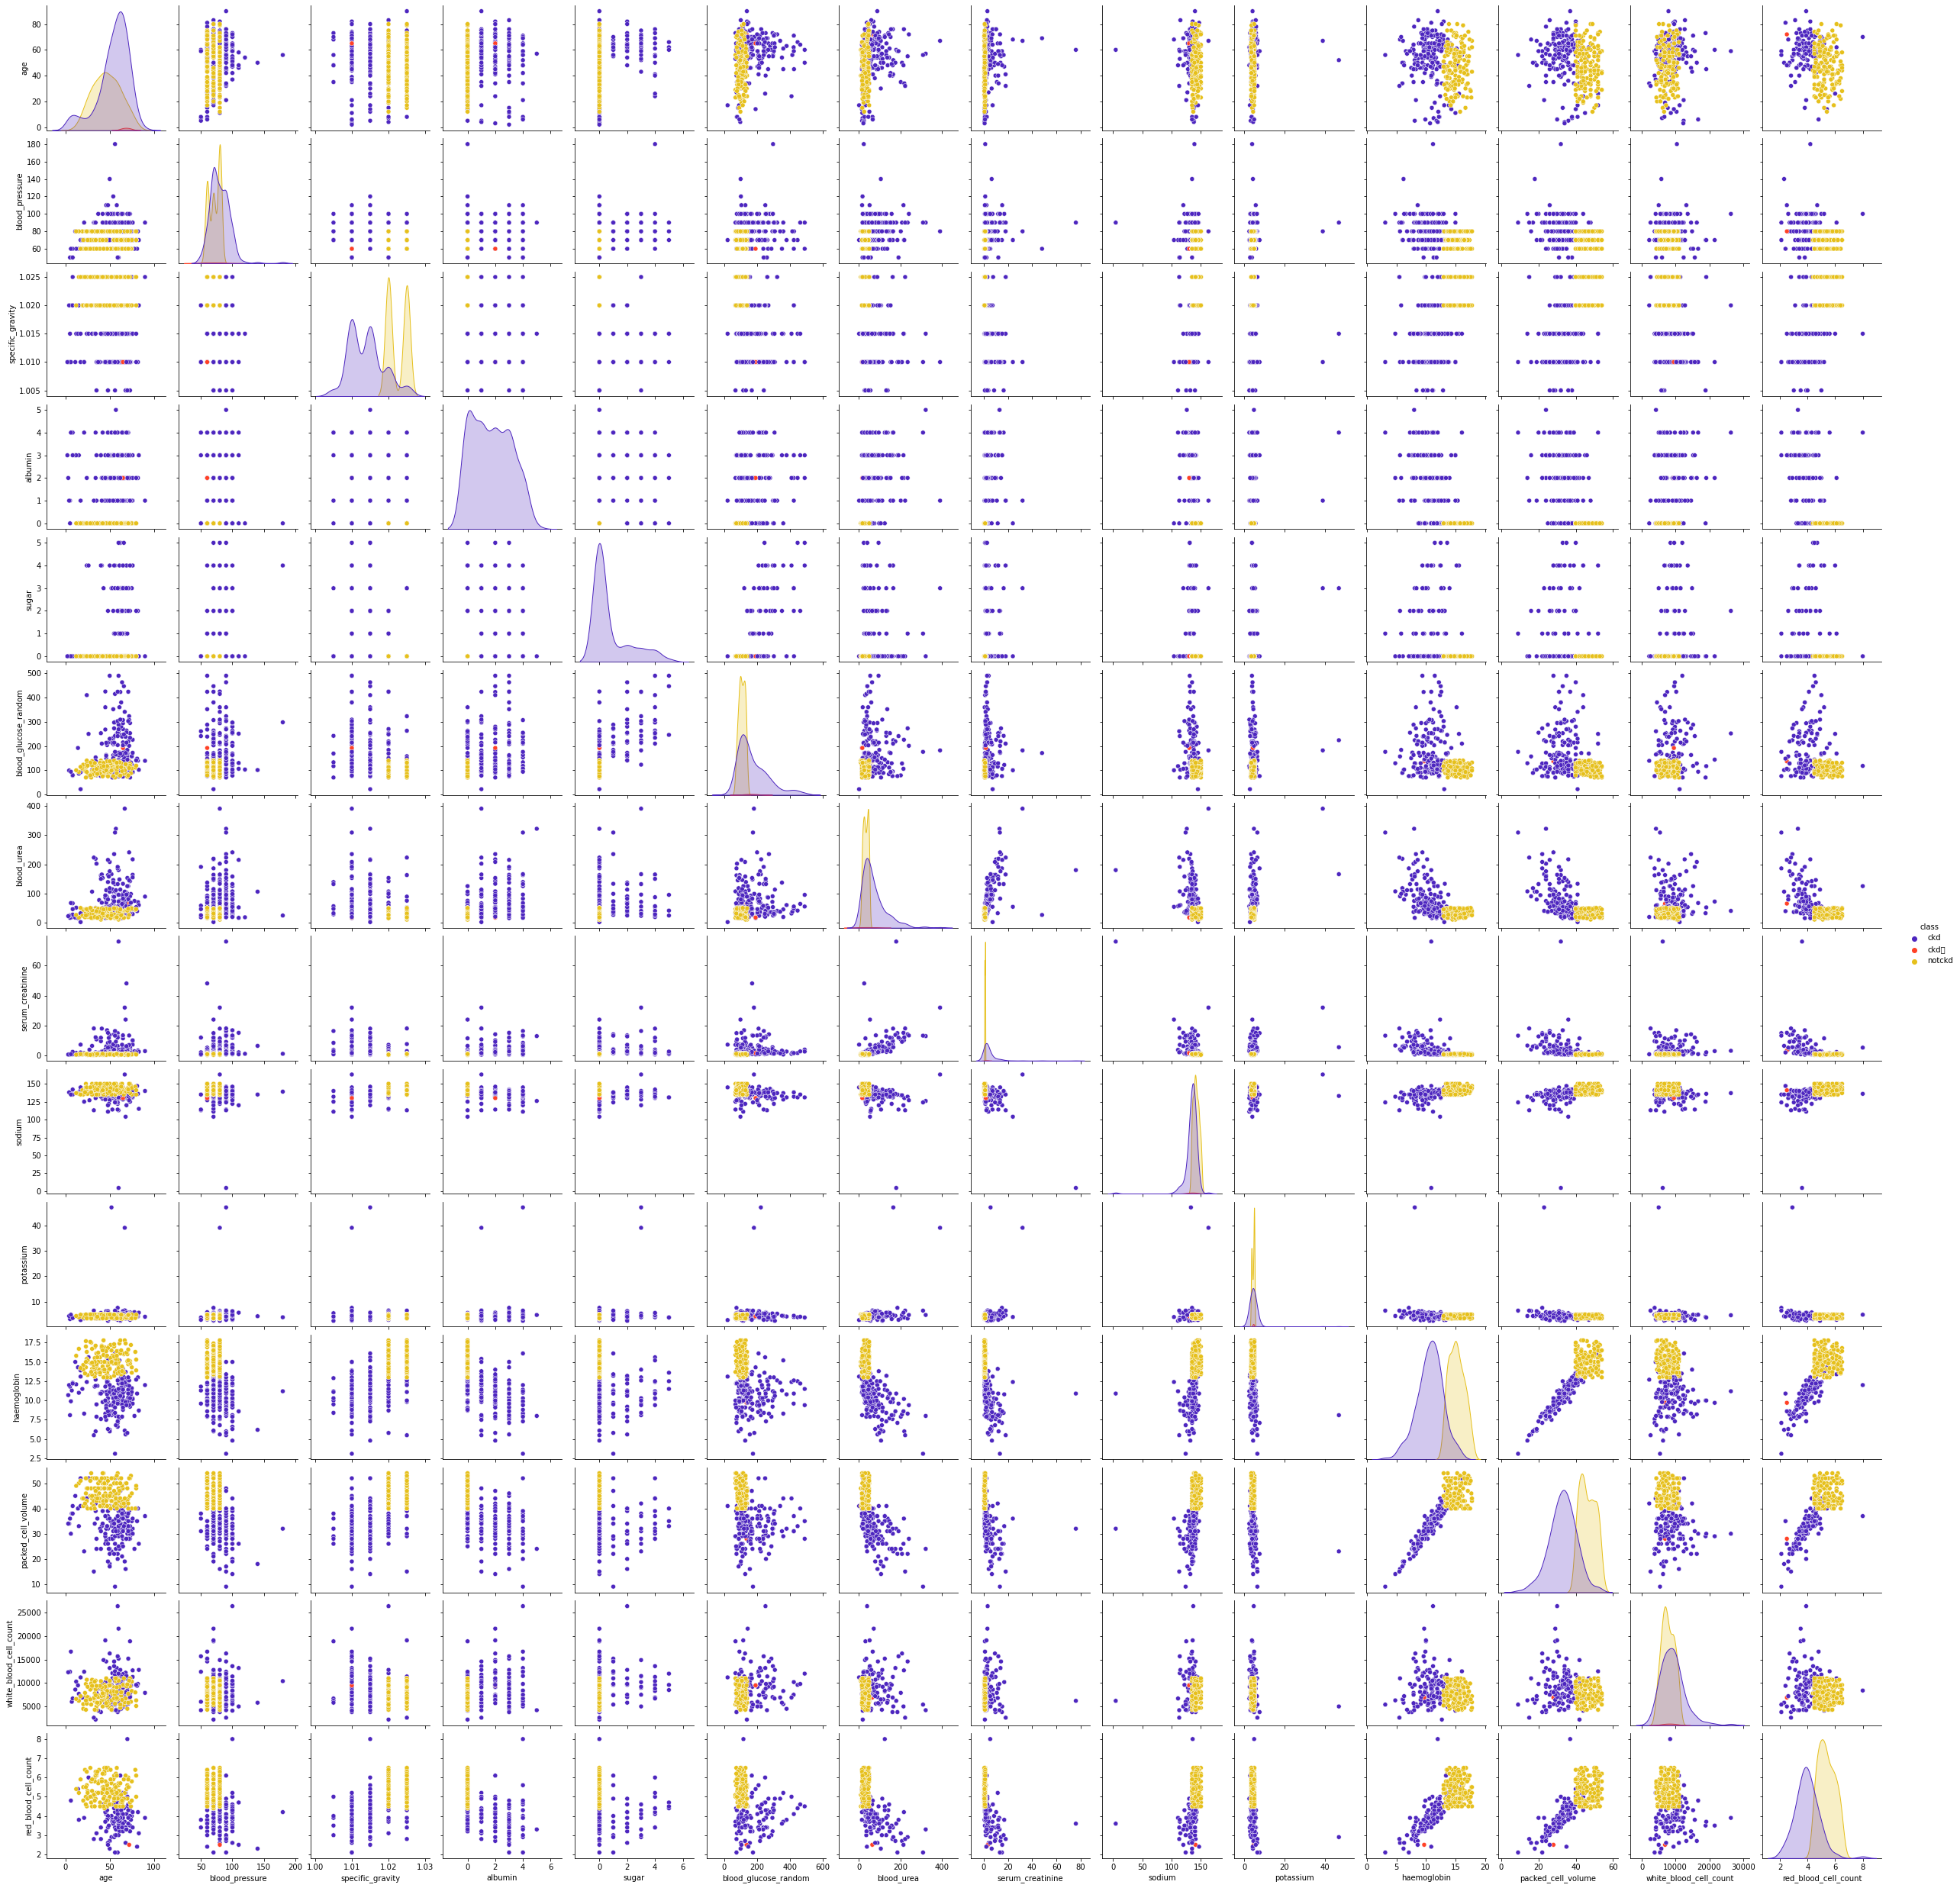

In [29]:
sns.pairplot(df, hue = 'class', palette = 'CMRmap')

### 4.4 Check how differnt numerical features are realated to target class

In [30]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

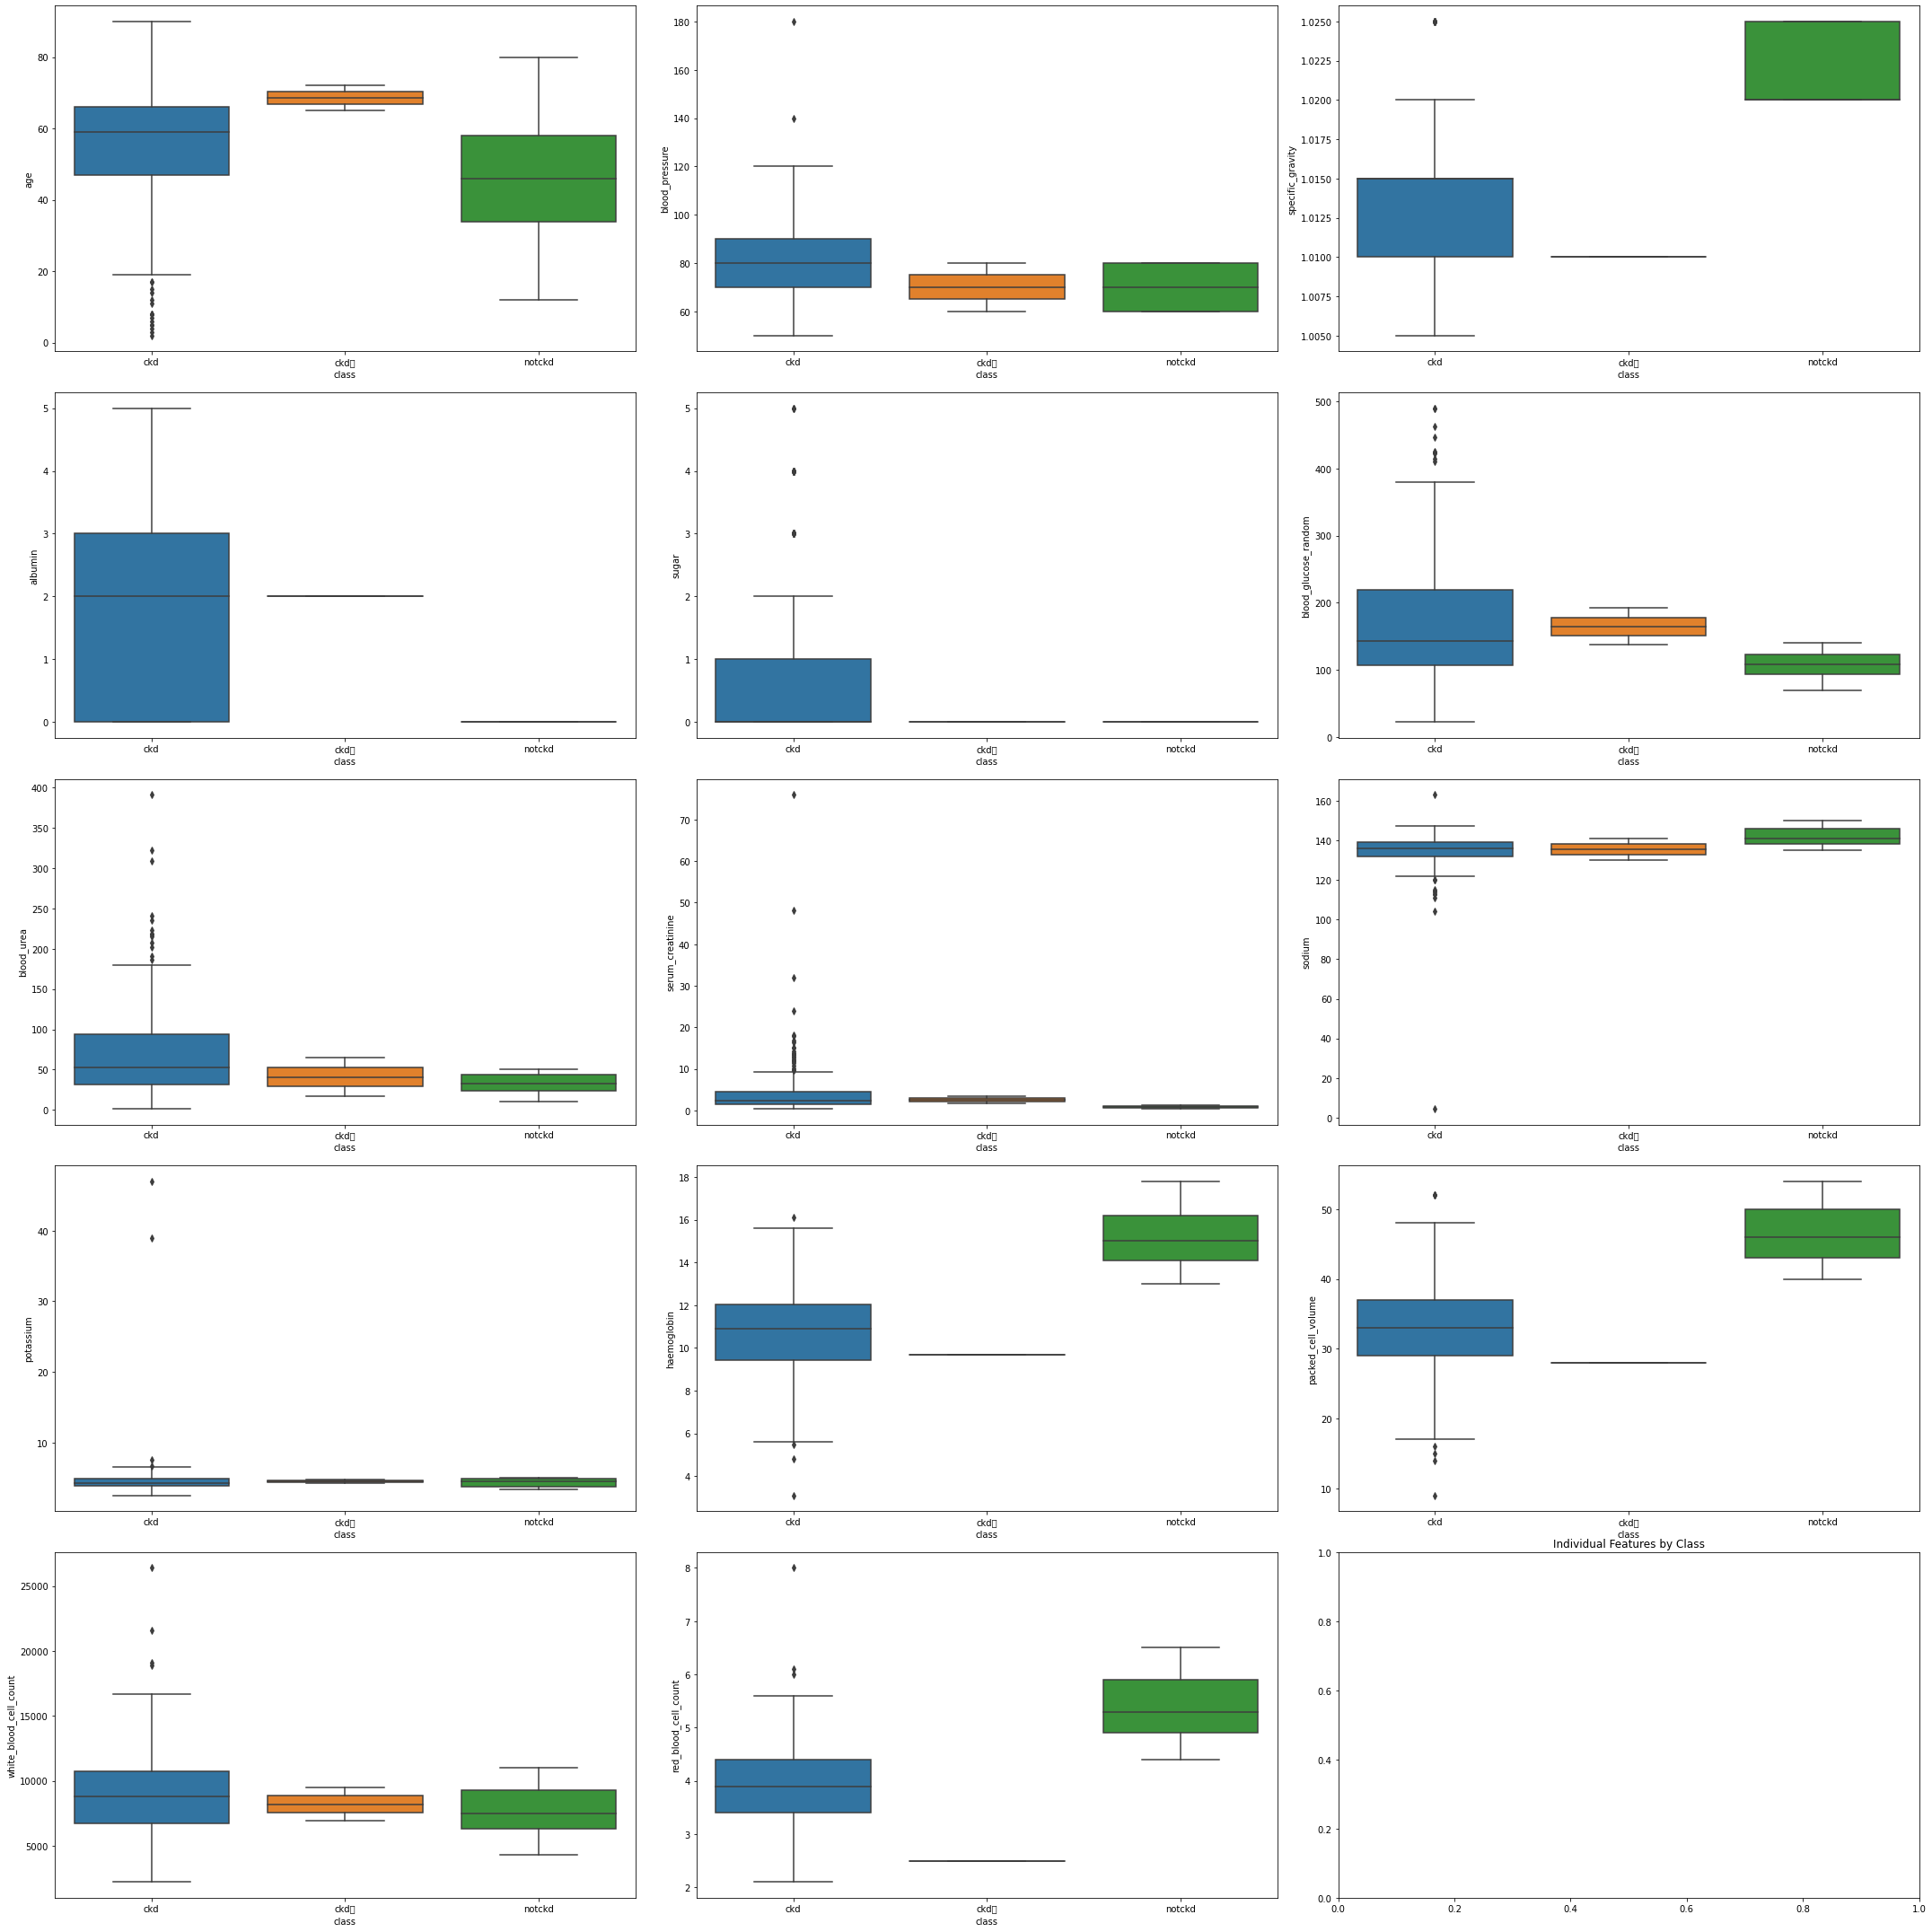

In [31]:
# Check the distribution of y variable corresponding to every x variable 
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,30))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df[input_target_class], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

### 3.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

There are lot of ways in which you can encode the categorical variables. Some of those are:
- Label Encoding
- One Hot Encoding
- Ordinal Encoding
- Frequency Encoding

In [36]:
df.columns.values

array(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'ypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'], dtype=object)

In [158]:
categorical_columns.remove(input_target_class)
categorical_columns

['appetite',
 'anemia',
 'bacteria',
 'coronary_artery_disease',
 'pus_cell',
 'pedal_edema',
 'ypertension',
 'diabetes_mellitus',
 'red_blood_cells',
 'pus_cell_clumps']

In [162]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)
    
    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'ypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']
Categorical Columns :  []
Numerical Columns :  ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [163]:
# Select the encoding technique according to the input provided
if input_encoding == "LabelEncoder":
    # Use LabelEncoder function from sklearn
    le = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))
    
elif input_encoding == "OneHotEncoder":
    # Use pandas get dummies function to one hot encode
    df = pd.get_dummies(df, columns=categorical_columns)
    
elif input_encoding == "OrdinalEncoder":
    # Use OrdinalEncoder function from sklearn
    oe = OrdinalEncoder()
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
elif input_encoding == "FrequencyEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency 
        fq = df.groupby(variable).size()/len(df)    
        # mapping values to dataframe 
        df.loc[:, "{}".format(variable)] = df[variable].map(fq) 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1. Split X and y

Split the X and y dataset

In [164]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class],axis=1)
y = df[input_target_class]

### 5.2. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [165]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

In [166]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

age  blood_pressure  specific_gravity   albumin     sugar  \
0 -0.210031        0.254214          0.421486  0.076249 -0.380269   
1 -2.627234       -1.972476          0.421486  2.363728 -0.380269   
2  0.615355        0.254214         -1.421074  0.838742  2.507853   
3 -0.210031       -0.488016         -2.342354  2.363728 -0.380269   
4 -0.033163        0.254214         -1.421074  0.838742 -0.380269   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  \
0          0.36489  0.484322        -0.342518 -0.241249             -0.320122   
1          0.36489  0.484322        -0.342518 -0.241249             -0.320122   
2          0.36489  0.484322        -0.342518 -0.241249              3.697618   
3          0.36489 -2.064742         2.919556 -0.241249             -0.373337   
4          0.36489  0.484322        -0.342518 -0.241249             -0.519679   

   blood_urea  serum_creatinine    sodium  potassium  haemoglobin  \
0   -0.419451         -0.319668  0.040104  -0.062903     1.053226   
1   -0.784315         -0.390819  0.040104  -0.062903    -0.457965   
2   -0.074858         -0.212942  0.040104  -0.062903    -1.084556   
3   -0.014047          0.142813 -2.896333  -0.737181    -0.494823   
4   -0.622154         -0.284093  0.040104  -0.062903    -0.347390   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0            0.603224               -0.197314              0.550044   
1           -0.132789               -0.909782              0.074073   
2           -0.991470               -0.316059              0.074073   
3           -0.868801               -0.632711             -0.996862   
4           -0.500795               -0.395222             -0.163913   

   ypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0     1.311903           1.385535                -0.304789 -0.507801   
1    -0.762252          -0.721743                -0.304789 -0.507801   
2    -0.762252           1.385535                -0.304789  1.969276   
3     1.311903          -0.721743                -0.304789  1.969276   
4    -0.762252          -0.721743                -0.304789 -0.507801   

   pedal_edema    anemia  
0    -0.484322 -0.420084  
1    -0.484322 -0.420084  
2    -0.484322  2.380476  
3     2.064742  2.380476  
4    -0.484322 -0.420084

### 5.3 Train - Test Split

Split the dataset in training and test set

In [167]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

### 5.4 Train Model

Train the model on training data

In [168]:
# Spot-Check Algorithms 
models = [] 
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis())) 
models.append(( 'KNN' , KNeighborsClassifier())) 
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(( 'NB' , GaussianNB())) 
models.append(('LGB', LGBMClassifier()))

In [169]:
# Training the model:
score_results = [] 
score_names = [] 
num_folds = 10 
scorings = ['accuracy', 'roc_auc']
for name, model in models:
    kfold = KFold(n_splits=num_folds) 
    for scoring in scorings:
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) 
        msg = "%s,%s: %f (%f)" % (name, scoring, cv_results.mean(), cv_results.std())
        print(msg)
        score_names.append(name)
    score_results.append(cv_results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LR,accuracy: 1.000000 (0.000000)


<IPython.core.display.Javascript object>

LR,roc_auc: 1.000000 (0.000000)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LDA,accuracy: 0.953571 (0.027894)


<IPython.core.display.Javascript object>

LDA,roc_auc: 0.994787 (0.008848)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN,accuracy: 0.964286 (0.027664)


<IPython.core.display.Javascript object>

KNN,roc_auc: 0.999745 (0.000765)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CART,accuracy: 0.967857 (0.029667)


<IPython.core.display.Javascript object>

CART,roc_auc: 0.960722 (0.038872)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RFC,accuracy: 0.989286 (0.022868)


<IPython.core.display.Javascript object>

RFC,roc_auc: 0.999490 (0.001531)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[21:01:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:49] WARNING: /Users/runner/miniforge3/cond

<IPython.core.display.Javascript object>

[21:01:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:52] WARNING: /Users/runner/miniforge3/cond

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NB,accuracy: 0.960714 (0.037287)


<IPython.core.display.Javascript object>

NB,roc_auc: 0.967389 (0.032010)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LGB,accuracy: 0.978571 (0.017496)


<IPython.core.display.Javascript object>

LGB,roc_auc: 0.998905 (0.002196)


### 5.5 Model fit, Predictions

Get the predictions from the model on testing data

### 5.6. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [170]:
# Define a function to compute various evaluation metrics 
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 

LR Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 1]
LR Y probability predicted :  [1.8037052521016162e-07, 0.9895297982806406, 0.9711635825097306, 2.302874417977372e-12, 1.5407973449278866e-09]

 Accuracy Score : 
  0.9916666666666667

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[71  1]
 [ 0 48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


 ROC curve : 



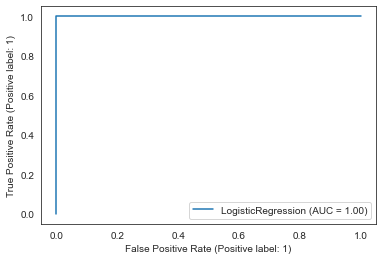

LDA Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 1]
LDA Y probability predicted :  [0.005011724108802211, 0.9952069438611767, 0.9931432694740396, 7.070583461710933e-08, 0.00035047802093480124]

 Accuracy Score : 
  0.9833333333333333

 AUC Score : 
 0.9997106481481481

 Confusion Matrix : 
  [[70  2]
 [ 0 48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120


 ROC curve : 



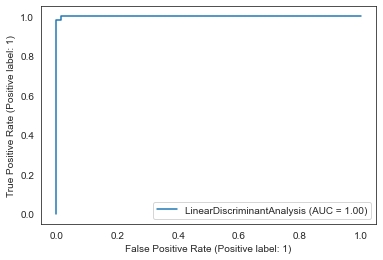

KNN Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 1]
KNN Y probability predicted :  [0.0, 1.0, 1.0, 0.0, 0.0]

 Accuracy Score : 
  0.9833333333333333

 AUC Score : 
 0.9930555555555556

 Confusion Matrix : 
  [[70  2]
 [ 0 48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120


 ROC curve : 



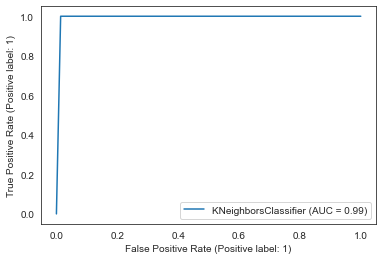

CART Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 1]
CART Y probability predicted :  [0.0, 1.0, 1.0, 0.0, 0.0]

 Accuracy Score : 
  0.9916666666666667

 AUC Score : 
 0.9895833333333333

 Confusion Matrix : 
  [[72  0]
 [ 1 47]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


 ROC curve : 



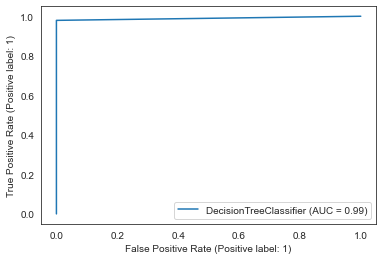

RFC Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 1]
RFC Y probability predicted :  [0.0, 0.88, 0.96, 0.0, 0.0]

 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[72  0]
 [ 0 48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


 ROC curve : 



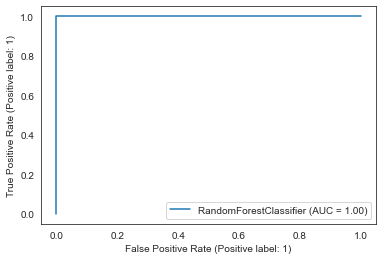

[21:02:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 1]
XGB Y probability predicted :  [0.0022306948, 0.98368555, 0.9958354, 0.0006578047, 0.0016758419]

 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[72  0]
 [ 0 48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.

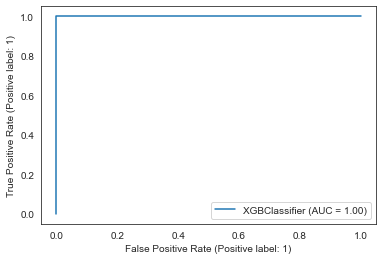

NB Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 1 1 0 0 1]
NB Y probability predicted :  [0.0, 1.0, 1.0, 0.0, 0.0]

 Accuracy Score : 
  0.975

 AUC Score : 
 0.9791666666666667

 Confusion Matrix : 
  [[69  3]
 [ 0 48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       0.94      1.00      0.97        48

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120


 ROC curve : 



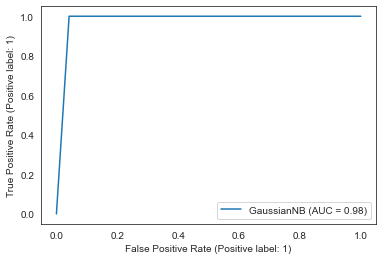

LGB Y predicted :  [0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 1]
LGB Y probability predicted :  [9.707500141044328e-05, 0.9992791342912986, 0.9999327740946744, 1.6024364844630664e-05, 1.5872290897321578e-05]

 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[72  0]
 [ 0 48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


 ROC curve : 



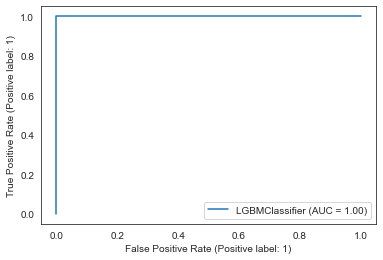

In [171]:
# Training the model and evaluate, prediction:
for name, model in models:
    model.fit(X_train, y_train)
    # Predict class for test dataset
    y_pred = model.predict(X_test)
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    print(name,"Y predicted : ",y_pred)
    print(name,"Y probability predicted : ",y_pred_prod[:5])
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LR,accuracy: 1.000000 (0.000000)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LDA,accuracy: 0.953571 (0.027894)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN,accuracy: 0.964286 (0.027664)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CART,accuracy: 0.964286 (0.035714)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RFC,accuracy: 0.985714 (0.023690)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[21:02:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:56] WARNING: /Users/runner/miniforge3/cond

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NB,accuracy: 0.960714 (0.037287)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LGB,accuracy: 0.978571 (0.017496)


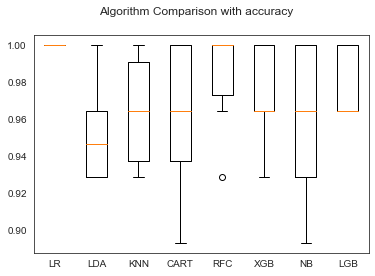

In [172]:
#alg comp using accuracy results

acc_results = [] 
acc_names = [] 
for name, model in models:
    kfold = KFold(n_splits=num_folds) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
    acc_results.append(cv_results) 
    acc_names.append(name) 
    msg = "%s,accuracy: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)
    
fig = plt.figure() 
fig.suptitle('Algorithm Comparison with accuracy') 
ax = fig.add_subplot(111) 
plt.boxplot(acc_results) 
ax.set_xticklabels(acc_names) 
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LR,roc: 1.000000 (0.000000)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LDA,roc: 0.994787 (0.008848)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN,roc: 0.999745 (0.000765)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CART,roc: 0.959598 (0.033796)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RFC,roc: 0.999490 (0.001531)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[22:31:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:42] WARNING: /Users/runner/miniforge3/cond

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NB,roc: 0.967389 (0.032010)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LGB,roc: 0.998905 (0.002196)


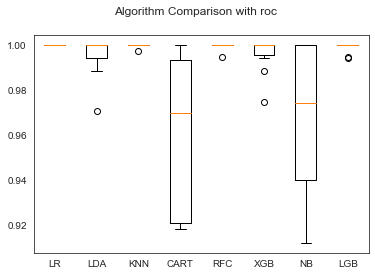

In [88]:
#alg comp using roc results

roc_results = [] 
roc_names = [] 
for name, model in models:
    kfold = KFold(n_splits=num_folds) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc') 
    roc_results.append(cv_results) 
    roc_names.append(name) 
    msg = "%s,roc: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)
    
fig = plt.figure() 
fig.suptitle('Algorithm Comparison with roc') 
ax = fig.add_subplot(111) 
plt.boxplot(roc_results) 
ax.set_xticklabels(roc_names) 
plt.show()

### 5.6 Feature importance

RFC Feature: age, Score: 0.00881
RFC Feature: blood_pressure, Score: 0.01147
RFC Feature: specific_gravity, Score: 0.08562
RFC Feature: albumin, Score: 0.06241
RFC Feature: sugar, Score: 0.00588
RFC Feature: red_blood_cells, Score: 0.00402
RFC Feature: pus_cell, Score: 0.00325
RFC Feature: pus_cell_clumps, Score: 0.00010
RFC Feature: bacteria, Score: 0.00068
RFC Feature: blood_glucose_random, Score: 0.03920
RFC Feature: blood_urea, Score: 0.03744
RFC Feature: serum_creatinine, Score: 0.17553
RFC Feature: sodium, Score: 0.03342
RFC Feature: potassium, Score: 0.00877
RFC Feature: haemoglobin, Score: 0.19096
RFC Feature: packed_cell_volume, Score: 0.13670
RFC Feature: white_blood_cell_count, Score: 0.00324
RFC Feature: red_blood_cell_count, Score: 0.08443
RFC Feature: ypertension, Score: 0.04251
RFC Feature: diabetes_mellitus, Score: 0.04873
RFC Feature: coronary_artery_disease, Score: 0.00000
RFC Feature: appetite, Score: 0.00597
RFC Feature: pedal_edema, Score: 0.00727
RFC Feature: anem

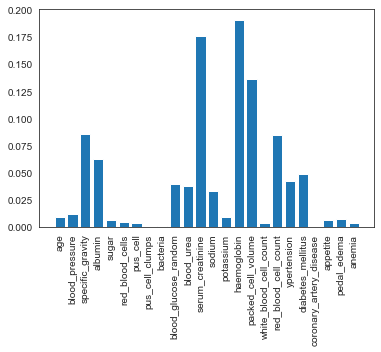

In [173]:
# RFC feature importance
model_rfc = RandomForestClassifier() 
# fit the model 
model_rfc.fit(X, y) 
# get importance 
importance = model_rfc.feature_importances_ 
# summarize feature importance 
for i,v in enumerate(importance):
    print( 'RFC Feature: %s, Score: %.5f' % (df.columns[i],v)) 
# plot feature importance 
plt.bar([df.columns[x] for x in range(len(importance))], importance) 
plt.xticks(df.columns[:-1], rotation='vertical')
plt.show()

## Using hypothesis testing as scoring metric for feature importance

In [202]:
# Split the dataset into the training set and test set after cat col encoder
no_scale_X_train, no_scale_X_test, no_scale_y_train, no_scale_y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# feature selection
def select_features(no_scale_X_train, no_scale_y_train):
    fs = SelectKBest(score_func=chi2, k= 20)
    ordered_feature=fs.fit(no_scale_X_train, no_scale_y_train)
    return ordered_feature
ordered_feature=select_features(no_scale_X_train, no_scale_y_train)

In [203]:
no_scale_X_train

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
92   71.0            70.0             1.010      3.0    0.0                1   
223  71.0            90.0             1.010      0.0    3.0                1   
234  37.0           100.0             1.010      0.0    0.0                0   
232  50.0            90.0             1.015      1.0    0.0                0   
377  64.0            70.0             1.020      0.0    0.0                1   
142  72.0            90.0             1.020      0.0    0.0                1   
22   48.0            80.0             1.025      4.0    0.0                1   
252  45.0            80.0             1.025      0.0    0.0                1   
350  65.0            70.0             1.025      0.0    0.0                1   
168  65.0            70.0             1.015      4.0    4.0                1   
150   8.0            60.0             1.025      3.0    0.0                1   
393  43.0            60.0             1.025      0.0    0.0                1   
66   67.0            70.0             1.020      2.0    0.0                0   
240  65.0            70.0             1.015      1.0    0.0                1   
218  33.0            90.0             1.015      0.0    0.0                1   
101  71.0            90.0             1.015      2.0    0.0                1   
311  56.0            60.0             1.025      0.0    0.0                1   
194  80.0            70.0             1.010      2.0    0.0                1   
326  47.0            60.0             1.020      0.0    0.0                1   
17   47.0            80.0             1.020      0.0    0.0                1   
164  14.0            80.0             1.015      0.0    0.0                1   
186   8.0            50.0             1.020      4.0    0.0                1   
30   55.0            70.0             1.020      0.0    0.0                1   
114  12.0            60.0             1.015      3.0    0.0                0   
263  45.0            80.0             1.020      0.0    0.0                1   
103  76.0            70.0             1.015      2.0    0.0                1   
358  47.0            60.0             1.020      0.0    0.0                1   
245  48.0           100.0             1.020      0.0    0.0                1   
235  45.0            70.0             1.010      2.0    0.0                1   
116  55.0            70.0             1.015      4.0    0.0                0   
330  43.0            80.0             1.020      0.0    0.0                1   
120  72.0            90.0             1.025      1.0    3.0                1   
289  42.0            70.0             1.020      0.0    0.0                1   
112  55.0            60.0             1.015      3.0    0.0                0   
215   2.0            80.0             1.010      3.0    0.0                1   
136  46.0            90.0             1.020      0.0    0.0                1   
275  52.0            80.0             1.020      0.0    0.0                1   
126  70.0            90.0             1.015      0.0    0.0                1   
198  59.0           100.0             1.020      4.0    2.0                1   
299  73.0            60.0             1.020      0.0    0.0                1   
281  55.0            80.0             1.025      0.0    0.0                1   
133  70.0           100.0             1.015      4.0    0.0                1   
33   60.0           100.0             1.020      2.0    0.0                0   
378  71.0            60.0             1.025      0.0    0.0                1   
162  59.0            70.0             1.020      0.0    0.0                1   
34   70.0            70.0             1.010      1.0    0.0                1   
231  60.0            90.0             1.020      0.0    0.0                1   
97   65.0            60.0             1.015      1.0    0.0                1   
85   70.0            70.0             1.015      2.0    0.0                1   
61   6

Feature age: 109.358574
Feature blood_pressure: 56.278555
Feature specific_gravity: 0.003129
Feature albumin: 139.820225
Feature sugar: 61.314607
Feature red_blood_cells: 1.920005
Feature pus_cell: 7.393656
Feature pus_cell_clumps: 16.617978
Feature bacteria: 7.449438
Feature blood_glucose_random: 1556.035234
Feature blood_urea: 1289.937495
Feature serum_creatinine: 187.996095
Feature sodium: 13.576238
Feature potassium: 3.067875
Feature haemoglobin: 74.887437
Feature packed_cell_volume: 187.622622
Feature white_blood_cell_count: 4482.392254
Feature red_blood_cell_count: 10.259505
Feature ypertension: 61.314607
Feature diabetes_mellitus: 58.449438
Feature coronary_artery_disease: 12.606742
Feature appetite: 33.808989
Feature pedal_edema: 32.089888
Feature anemia: 21.202247


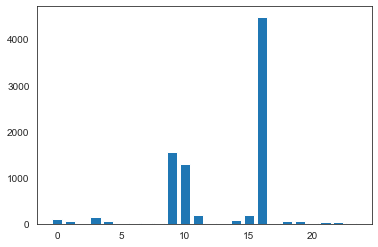

In [204]:
# scores for the features 
for i in range(len(ordered_feature.scores_)):
    print( 'Feature %s: %f' % (no_scale_X_train.columns[i], ordered_feature.scores_[i])) # plot the scores 
plt.bar([i for i in range(len(ordered_feature.scores_))], ordered_feature.scores_) 
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model. 

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results. 

In this section you will:
- Handle class imbalance
- Save the final model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

In [214]:
# Over sample the minority class 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

y_ros.value_counts()

0    250
1    250
Name: class, dtype: int64

In [215]:
# Define the function to build model on balanced dataset
def classification_model(X, y):
    
    scaled_X = scale_data(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model

LR

 Accuracy Score : 
  0.98

 AUC Score : 
 0.9998221906116643

 Confusion Matrix : 
  [[71  3]
 [ 0 76]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        74
           1       0.96      1.00      0.98        76

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


 ROC curve : 



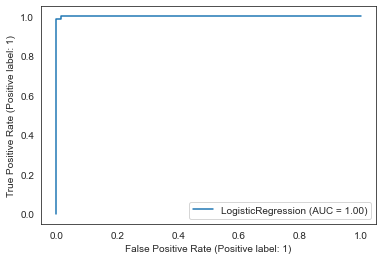

LDA

 Accuracy Score : 
  0.9666666666666667

 AUC Score : 
 0.9989331436699859

 Confusion Matrix : 
  [[69  5]
 [ 0 76]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        74
           1       0.94      1.00      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


 ROC curve : 



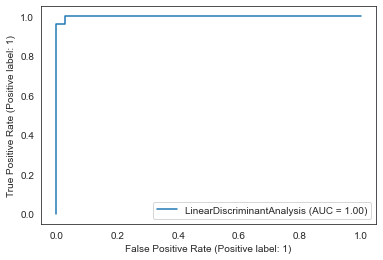

KNN

 Accuracy Score : 
  0.9666666666666667

 AUC Score : 
 0.9932432432432433

 Confusion Matrix : 
  [[69  5]
 [ 0 76]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        74
           1       0.94      1.00      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


 ROC curve : 



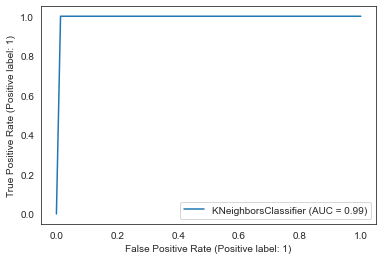

CART

 Accuracy Score : 
  0.98

 AUC Score : 
 0.9802631578947368

 Confusion Matrix : 
  [[74  0]
 [ 3 73]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.96      0.98        76

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


 ROC curve : 



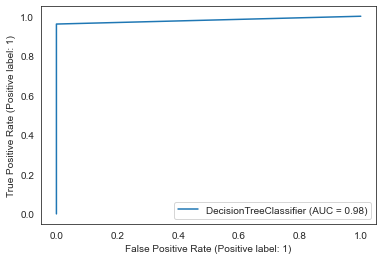

RFC

 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[74  0]
 [ 0 76]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


 ROC curve : 



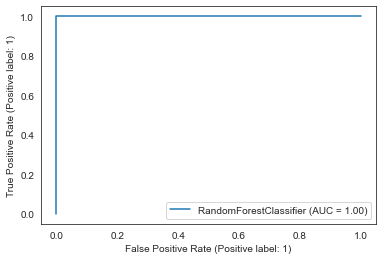

XGB
[19:03:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643226991592/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Accuracy Score : 
  0.9933333333333333

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[74  0]
 [ 1 75]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.99      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


 ROC curve : 



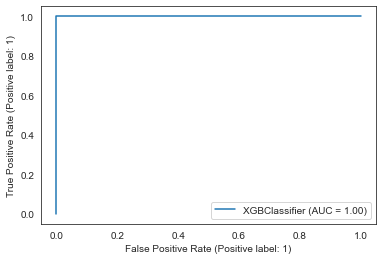

NB

 Accuracy Score : 
  0.98

 AUC Score : 
 0.9797297297297297

 Confusion Matrix : 
  [[71  3]
 [ 0 76]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        74
           1       0.96      1.00      0.98        76

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


 ROC curve : 



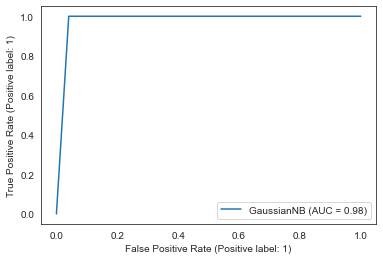

LGB

 Accuracy Score : 
  0.9933333333333333

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[73  1]
 [ 0 76]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.99      1.00      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


 ROC curve : 



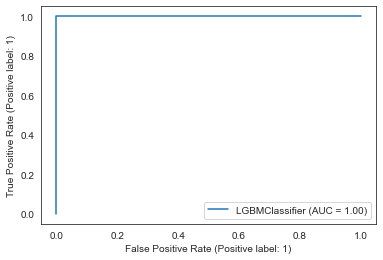

In [216]:
# Build model on balanced data and get evaluation metrics
# run balanced evaluation metrics on all models
for name, model in models:
    print(name)
    classification_model(X_ros, y_ros)
    

### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [ ]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [207]:
# Define the parameters gird for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],  
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           } 

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  

# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 } 

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

In [117]:
def grid_model(X, y):
    
    scaled_X = scale_data(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Run grid search for lgbm
    model = LGBMClassifier()
    param_grid = param_grid_lgbm
    
    grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, n_jobs = -1) 
    # fit the model for grid search 
    grid.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = grid.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = grid.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    print("Y predicted : ",y_pred)
    print("Y probability predicted : ",y_pred_prod[:5])
    
    # Compute Evaluation Metric
    compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)
    
    # save the model to disk
    filename = 'final_model.sav'
    pickle.dump(grid.best_estimator_, open(filename, 'wb'))
    return grid

## Random search

In [217]:
# Run random search for lgbm
model = LGBMClassifier()
param_rdn = param_grid_lgbm

In [222]:
def random_search(X, y):
    scaled_X = scale_data(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)
    
    # Run grid search for lgbm
    model = LGBMClassifier()
    param_grid = param_grid_lgbm
    
    random_search=RandomizedSearchCV(model,param_distributions=param_rdn,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
    # fit the model for random search 
    random_search.fit(X_train, y_train)
    print(random_search.best_estimator_)
    print(random_search.best_params_)
    
    # Predict class for test dataset
    y_pred=random_search.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = random_search.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    print("Y predicted : ",y_pred)
    print("Y probability predicted : ",y_pred_prod[:5])
    
    # Compute Evaluation Metric
    compute_evaluation_metric(random_search, X_test, y_test, y_pred, y_pred_prod)
    
    return random_search

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
LGBMClassifier(max_depth=10, n_estimator=100, num_leaves=256)
{'num_leaves': 256, 'n_estimator': 100, 'max_depth': 10, 'learning_rate': 0.1}
Y predicted :  [0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1
 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1
 0 0]
Y probability predicted :  [2.0412716217308192e-05, 0.9999086326890452, 0.9991837306184703, 0.9999339397931517, 0.9999720892542188]

 Accuracy Score : 
  0.9933333333333333

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[73  1]
 [ 0 76]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.99      1.00      0.99        76

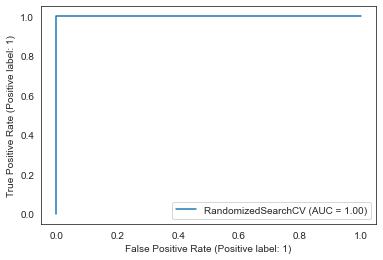

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [5, 8, 10],
                                        'n_estimator': [100, 200],
                                        'num_leaves': [256, 128]},
                   scoring='roc_auc', verbose=3)

[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 4/5] END learning_rate=0.05, max_depth=8, n_estimator=200, num_leaves=128;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 4/5] END learning_rate=0.1, max_depth=8, n_estimator=100, num_leaves=256;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimator=200, num_leaves=256;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimator=100, num_leaves=256;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 1/5] END learning_rate=0.1, max_depth=8, n_estimator=200, num_leaves=128;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimator=200, num_leaves=128;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unkn

In [223]:
random_search(X_ros, y_ros)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
Y predicted :  ['ckd' 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd'
 'ckd' 'ckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd'
 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd'
 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd'
 'ckd' 'notck

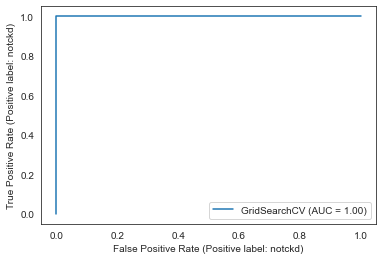

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [5, 8, 10],
                         'n_estimator': [100, 200], 'num_leaves': [256, 128]},
             verbose=3)

In [118]:
grid_model(X_ros, y_ros)

### 6.3. Save the final model

In [119]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

LGBMClassifier(max_depth=5, n_estimator=100, num_leaves=256)

[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimator=100, num_leaves=128;, score=0.971 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimator=200, num_leaves=256;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 1/5] END learning_rate=0.05, max_depth=8, n_estimator=100, num_leaves=128;, score=0.971 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 1/5] END learning_rate=0.05, max_depth=8, n_estimator=200, num_leaves=256;, score=0.971 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 5/5] END learning_rate=0.05, max_depth=8, n_estimator=200, num_leaves=128;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 4/5] END learning_rate=0.05, max_depth=10, n_estimator=100, num_leaves=128;, score=0.971 total time=   0.0s
[LightGBM] [Warning] 

[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimator=100, num_leaves=256;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimator=200, num_leaves=128;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 2/5] END learning_rate=0.05, max_depth=8, n_estimator=100, num_leaves=128;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 2/5] END learning_rate=0.05, max_depth=8, n_estimator=200, num_leaves=128;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 5/5] END learning_rate=0.05, max_depth=10, n_estimator=100, num_leaves=256;, score=1.000 total time=   0.0s
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV 3/5] END learning_rate=0.05, max_depth=10, n_estimator=200, num_leaves=256;, score=1.000 total time=   0.0s
[LightGBM] [Warning]